In [87]:
#importing the libraries I need to create charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords


In [72]:
#bringing the files into jupyter 
df= pd.read_csv('/Users/theresuh187/Desktop/boxofficefolder/boxoffice.csv')
blockbuster_df= pd.read_csv('/Users/theresuh187/Desktop/boxofficefolder/blockbusters.csv')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


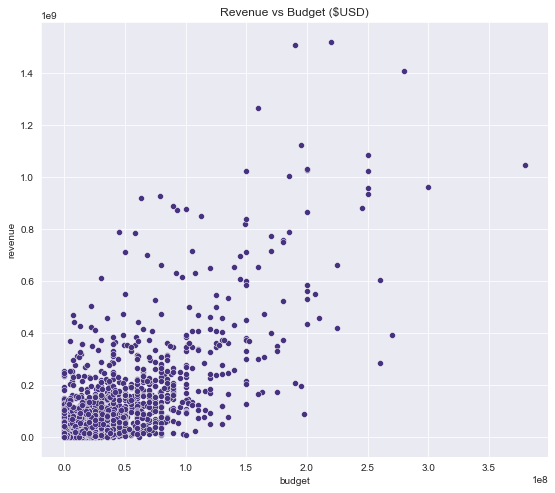

In [99]:
#creating a chart comparing budget and revenue with a scatterplot
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(df['budget'], df['revenue'])
plt.title('Revenue vs Budget ($USD)');

In [76]:
#creating a new table of the top 50 grossing movies from the existing table
top_grossing_df = df[['title','budget','revenue', 'all_genres', 'tagline', 'overview']].sort_values(['revenue'], 
ascending=False).head(50)

In [6]:
#checking the new table to make sure I did it right
top_grossing_df

,title,budget,revenue,all_genres
1126,The Avengers,220000000,1519557910,Action Adventure Science Fiction
1761,Furious 7,190000000,1506249360,Action
2770,Avengers: Age of Ultron,280000000,1405403694,Action Adventure Science Fiction
684,Beauty and the Beast,160000000,1262886337,Family Fantasy Romance
2322,Transformers: Dark of the Moon,195000000,1123746996,Action Adventure Science Fiction
906,The Dark Knight Rises,250000000,1084939099,Action Crime Drama Thriller
2135,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,Action Adventure Fantasy
2562,Finding Dory,200000000,1028570889,Adventure Animation Comedy Family
881,Alice in Wonderland,200000000,1025491110,Adventure Family Fantasy
734,Zootopia,150000000,1023784195,Adventure Animation Comedy Family


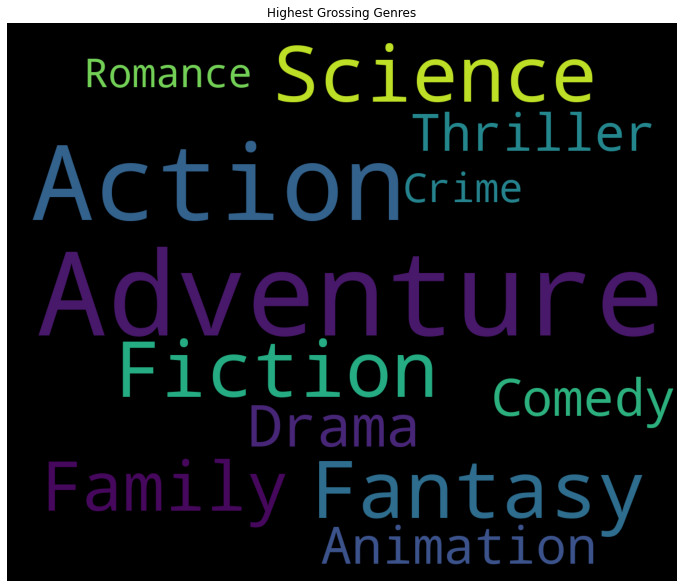

In [19]:
#Using a wordcloud generate top genres in the top 50 grossing movies
plt.figure(figsize = (12, 12))
text = ' '.join(top_grossing_df['all_genres'].values)
wordcloud = WordCloud(collocations=False,
                    max_font_size=None,
                      background_color='black',
                      width=1200,
                      height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Highest Grossing Genres')
plt.axis("off")
plt.show()

In [95]:
# Deleting symbols and changing data type to "float" 
blockbuster_df['worldwide_gross'] = blockbuster_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
blockbuster_df.head()

/var/folders/_d/j970g__s4mq3bb2b1jvj3ftr0000gn/T/ipykernel_55723/1276835245.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  blockbuster_df['worldwide_gross'] = blockbuster_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018


Text(0.5, 1.0, 'Rating vs. Worldwide Gross')

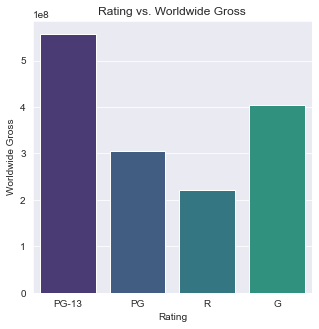

In [96]:
# Creating bar chart to see ratings and their prospective worldwide gross from
# the blockbuster.csv file
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.set_palette("viridis")
sns.barplot(x=blockbuster_df.rating, y=blockbuster_df.worldwide_gross, ci=None)
plt.xlabel('Rating')
plt.ylabel('Worldwide Gross')
plt.title('Rating vs. Worldwide Gross')

In [ ]:
# 1. Creating a new column with the contents defaulting to 0 (null) 
#    for documenting whether or not the movie was part of a collection
# 2. Locating the collection column. If empty cell (null), then the "has_collection"
#    cell will generate "false". If cell has contents, will generate 1 (true)
df['has_collection'] = 0
df.loc[df['collection'].isnull() == False, 'has_collection'] = 1

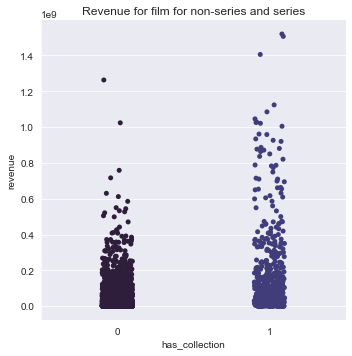

In [73]:
# Using a catplot to compare revenue to movies with and without a collection.
sns.catplot(x='has_collection', y='revenue', palette=sns.color_palette("mako"), data=df);
plt.title('Revenue for film for non-series and series');

In [52]:
# 1. Creating a new column with the contents defaulting to 0 (null) 
#    for documenting whether or not the movie had a homepage
# 2. Locating the homepage column. If empty cell (null), then the "has_homepage"
#    cell will generate "false". If cell has contents, will generate 1 (true)
df['has_homepage'] = 0
df.loc[df['homepage'].isnull() == False, 'has_homepage'] = 1

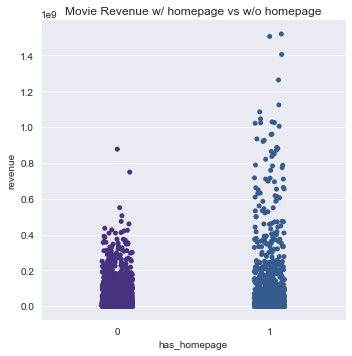

In [53]:
# Using a catplot to compare revenue to movies with and without a homepage.
sns.catplot(x='has_homepage', y='revenue', palette=sns.color_palette("viridis"), data=df);
plt.title('Movie Revenue w/ homepage vs w/o homepage');

In [84]:
#creating a new table of the top 25 grossing movies from the existing table
top_25_grossing_df = df[['title','budget','revenue', 'all_genres', 'tagline', 'overview']].sort_values(['revenue'], 
ascending=False).head(25)

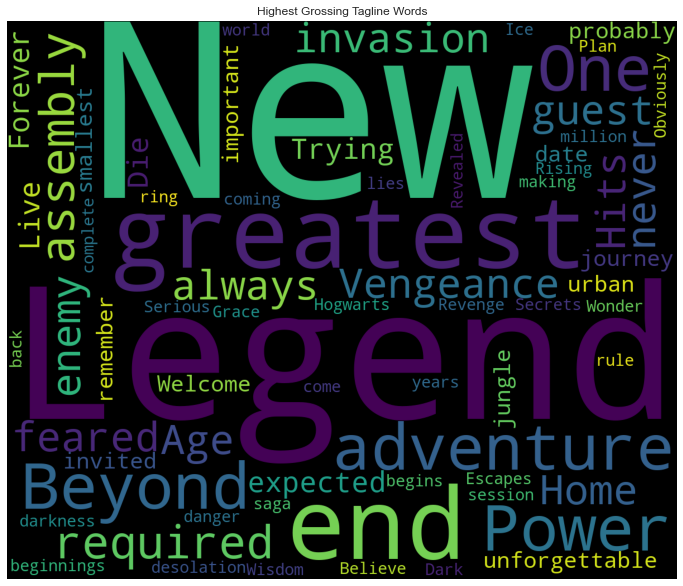

In [85]:
#Using a wordcloud generate top genres in the top 25 grossing movies
top_25_grossing_df['tagline'] = top_25_grossing_df['tagline'].str.replace('Come', '')
plt.figure(figsize = (12, 12))
text = ' '.join(top_25_grossing_df['tagline'].values)
wordcloud = WordCloud(collocations=False,
                    max_font_size=None,
                      background_color='black',
                      width=1200,
                      height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Highest Grossing Tagline Words')
plt.axis("off")
plt.show()

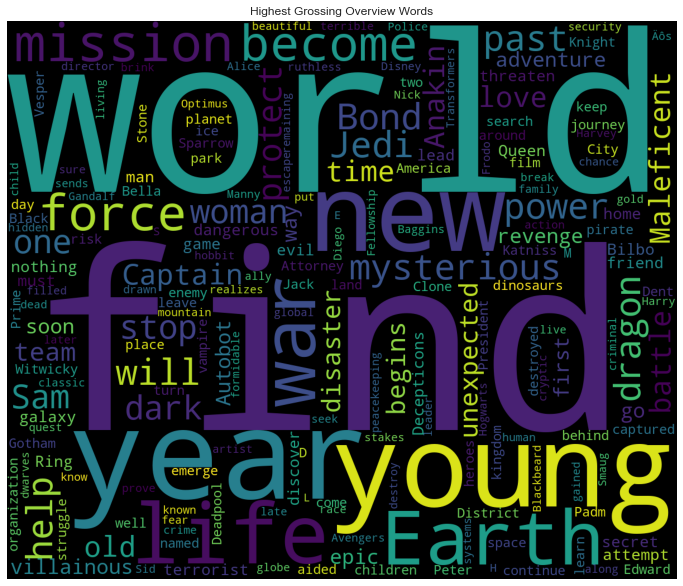

In [86]:
#Using a wordcloud generate top genres in the top 25 grossing movies
top_25_grossing_df['overview'] = top_25_grossing_df['overview'].str.replace('back', '')
top_25_grossing_df['overview'] = top_25_grossing_df['overview'].str.replace('Batman', '')
top_25_grossing_df['overview'] = top_25_grossing_df['overview'].str.replace('Äì', '')
plt.figure(figsize = (12, 12))
text = ' '.join(top_grossing_df['overview'].values)
wordcloud = WordCloud(collocations=False,
                    max_font_size=None,
                      background_color='black',
                      width=1200,
                      height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Highest Grossing Overview Words')
plt.axis("off")
plt.show()

In [ ]:
# used Tableau to generate treemap for high-revenue generating release dates

In [ ]:
# Thank you for viewing. Happy Coding!